In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'sex',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'label']
df_adult_data = pd.read_csv("adult.data", header=None, names=column_names)
df_adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df_adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  label           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df_adult_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df_adult_test = pd.read_csv("adult.test", header=None, names=column_names)
df_adult_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [6]:
df_adult_test = df_adult_test.drop(index=0)
df_adult_test = df_adult_test.reset_index(drop=True)
df_adult_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
4,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [7]:
df_adult_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             16281 non-null  object 
 1   workclass       16281 non-null  object 
 2   fnlwgt          16281 non-null  float64
 3   education       16281 non-null  object 
 4   education-num   16281 non-null  float64
 5   marital-status  16281 non-null  object 
 6   occupation      16281 non-null  object 
 7   relationship    16281 non-null  object 
 8   race            16281 non-null  object 
 9   sex             16281 non-null  object 
 10  capital-gain    16281 non-null  float64
 11  capital-loss    16281 non-null  float64
 12  hours-per-week  16281 non-null  float64
 13  native-country  16281 non-null  object 
 14  label           16281 non-null  object 
dtypes: float64(5), object(10)
memory usage: 1.9+ MB


In [8]:
df_adult_test.describe()

,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


### DATA CLEANING

In [9]:
df_train = df_adult_data.copy()

In [10]:
df_train.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [11]:
df_train['workclass'] = df_train['workclass'].replace({' State-gov': 'State government',
                               ' Self-emp-not-inc': 'Self employed',
                               ' Federal-gov':'Federal government',
                               ' Local-gov':'Local government',
                               ' Self-emp-inc':'Self employed',
                               ' Without-pay':'Voluntary',
                               ' Never-worked':'Unemployed',
                               ' Private':'Private'})

In [12]:
df_train.workclass.unique()

array(['State government', 'Self employed', 'Private',
       'Federal government', 'Local government', ' ?', 'Voluntary',
       'Unemployed'], dtype=object)

In [13]:
df_train.drop(df_train[df_train['workclass'] == ' ?'].index, inplace=True)

In [14]:
df_train.workclass.unique()

array(['State government', 'Self employed', 'Private',
       'Federal government', 'Local government', 'Voluntary',
       'Unemployed'], dtype=object)

In [15]:
df_train = df_train.reset_index(drop=True)
df_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State government,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self employed,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30720,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30721,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30722,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30723,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [16]:
for col in df_train.select_dtypes('object'):
    df_train[col] = df_train[col].str.strip()

In [17]:
df_train.education.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', 'Preschool', '12th', '1st-4th'], dtype=object)

In [18]:
df_train['education'] = df_train['education'].replace({'HS-grad': 'High school graduate',
                               'Some-college': 'College',
                               'Assoc-acdm':'Associate academic',
                               'Assoc-voc':'Associate vocational',
                               'Prof-school':'Professional school degree'})

In [19]:
df_train.education.unique()

array(['Bachelors', 'High school graduate', '11th', 'Masters', '9th',
       'College', 'Associate academic', 'Associate vocational', '7th-8th',
       'Doctorate', 'Professional school degree', '5th-6th', '10th',
       'Preschool', '12th', '1st-4th'], dtype=object)

In [20]:
df_train['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [21]:
df_train['marital-status'] = df_train['marital-status'].replace({'Never-married': 'Single',
                               'Married-civ-spouse': 'Married civilian',
                               'Married-spouse-absent':'Married spouse absent',
                               'Married-AF-spouse':'Married Armed Forces'})

In [22]:
df_train['marital-status'].unique()

array(['Single', 'Married civilian', 'Divorced', 'Married spouse absent',
       'Separated', 'Married Armed Forces', 'Widowed'], dtype=object)

In [23]:
df_train['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv', '?'], dtype=object)

In [24]:
df_train['occupation'] = df_train['occupation'].replace({'Adm-clerical': 'Administrative',
                               'Exec-managerial': 'Managerial',
                               'Handlers-cleaners':'Handlers',
                               'Prof-specialty':'Professional',
                               'Other-service':'Service',
                               'Craft-repair':'Craft and repair',
                               'Transport-moving':'Transport',
                               'Farming-fishing':'Agricultural',
                               'Machine-op-inspct':'Machine inspectors',
                               'Tech-support':'Tech support',
                               'Protective-serv':'Protective services',
                               'Armed-Forces':'Armed Forces',
                               'Priv-house-serv':'Private Household Workers'})

In [25]:
df_train.drop(df_train[df_train['occupation'] == '?'].index, inplace=True)
df_train.occupation.unique()

array(['Administrative', 'Managerial', 'Handlers', 'Professional',
       'Service', 'Sales', 'Craft and repair', 'Transport',
       'Agricultural', 'Machine inspectors', 'Tech support',
       'Protective services', 'Armed Forces', 'Private Household Workers'],
      dtype=object)

In [26]:
df_train = df_train.reset_index(drop=True)
df_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State government,77516,Bachelors,13,Single,Administrative,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self employed,83311,Bachelors,13,Married civilian,Managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,High school graduate,9,Divorced,Handlers,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married civilian,Handlers,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married civilian,Professional,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30713,27,Private,257302,Associate academic,12,Married civilian,Tech support,Wife,White,Female,0,0,38,United-States,<=50K
30714,40,Private,154374,High school graduate,9,Married civilian,Machine inspectors,Husband,White,Male,0,0,40,United-States,>50K
30715,58,Private,151910,High school graduate,9,Widowed,Administrative,Unmarried,White,Female,0,0,40,United-States,<=50K
30716,22,Private,201490,High school graduate,9,Single,Administrative,Own-child,White,Male,0,0,20,United-States,<=50K


In [27]:
df_train.relationship.unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [28]:
df_train['relationship'] = df_train['relationship'].replace({'Not-in-family': 'Not in family',
                               'Own-child': 'Child',
                               'Unmarried':'Single',
                               'Other-relative':'Relative'})

In [29]:
df_train.relationship.unique()

array(['Not in family', 'Husband', 'Wife', 'Child', 'Single', 'Relative'],
      dtype=object)

In [30]:
df_train['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Poland', 'Columbia', 'Cambodia', 'Thailand',
       'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'Italy', 'China', 'South', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [31]:
df_train['native-country'] = df_train['native-country'].replace({'United-States': 'United States',
                               'Puerto-Rico': 'Puerto Rico',
                               'Dominican-Republic':'Dominican Republic',
                               'Trinadad&Tobago':'Trinadad & Tobago',
                               'Hong':'Hong Kong',
                               'Holand-Netherlands':'Netherlands'})

In [32]:
df_train['native-country'].unique()

array(['United States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'Puerto Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Poland', 'Columbia', 'Cambodia', 'Thailand',
       'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican Republic', 'El-Salvador', 'France', 'Guatemala',
       'Italy', 'China', 'South', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad & Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong Kong', 'Ireland',
       'Hungary', 'Netherlands'], dtype=object)

In [33]:
df_train.drop(df_train[df_train['native-country'] == '?'].index, inplace=True)
df_train.drop(df_train[df_train['native-country'] == 'South'].index, inplace=True)
df_train['native-country'].unique()

array(['United States', 'Cuba', 'Jamaica', 'India', 'Mexico',
       'Puerto Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Poland', 'Columbia', 'Cambodia', 'Thailand',
       'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican Republic', 'El-Salvador', 'France', 'Guatemala',
       'Italy', 'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad & Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong Kong', 'Ireland',
       'Hungary', 'Netherlands'], dtype=object)

In [34]:
df_train.to_csv('c.csv')

In [35]:
df_test = df_adult_test.copy()

In [36]:
df_test.workclass.unique()

array([' Private', ' Local-gov', ' ?', ' Self-emp-not-inc',
       ' Federal-gov', ' State-gov', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [37]:
df_test['workclass'] = df_test['workclass'].replace({' State-gov': 'State government',
                               ' Self-emp-not-inc': 'Self employed',
                               ' Federal-gov':'Federal government',
                               ' Local-gov':'Local government',
                               ' Self-emp-inc':'Self employed',
                               ' Without-pay':'Voluntary',
                               ' Never-worked':'Unemployed',
                               ' Private' : 'Private'})

In [38]:
df_test.workclass.unique()

array(['Private', 'Local government', ' ?', 'Self employed',
       'Federal government', 'State government', 'Voluntary',
       'Unemployed'], dtype=object)

In [39]:
df_test.drop(df_test[df_test['workclass'] == ' ?'].index, inplace=True)

In [40]:
df_test.workclass.unique()

array(['Private', 'Local government', 'Self employed',
       'Federal government', 'State government', 'Voluntary',
       'Unemployed'], dtype=object)

In [41]:
df_test = df_test.reset_index(drop=True)
df_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
2,28,Local government,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
4,34,Private,198693.0,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15313,33,Private,245211.0,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K.
15314,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
15315,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
15316,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


In [42]:
for col in df_test.select_dtypes('object'):
    df_test[col] = df_test[col].str.strip()

In [43]:
df_test.education.unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [44]:
df_test['education'] = df_test['education'].replace({'HS-grad': 'High school graduate',
                               'Some-college': 'College',
                               'Assoc-acdm':'Associate academic',
                               'Assoc-voc':'Associate vocational',
                               'Prof-school':'Professional school degree'})

In [45]:
df_test.education.unique()

array(['11th', 'High school graduate', 'Associate academic', 'College',
       '10th', 'Professional school degree', '7th-8th', 'Bachelors',
       'Masters', 'Doctorate', '5th-6th', 'Associate vocational', '9th',
       '12th', '1st-4th', 'Preschool'], dtype=object)

In [46]:
df_test['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Separated',
       'Divorced', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [47]:
df_test['marital-status'] = df_test['marital-status'].replace({'Never-married': 'Single',
                               'Married-civ-spouse': 'Married civilian',
                               'Married-spouse-absent':'Married spouse absent',
                               'Married-AF-spouse':'Married Armed Forces'})

In [48]:
df_test['marital-status'].unique()

array(['Single', 'Married civilian', 'Widowed', 'Separated', 'Divorced',
       'Married spouse absent', 'Married Armed Forces'], dtype=object)

In [49]:
df_test['occupation'].unique()


array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces', '?'],
      dtype=object)

In [50]:
df_test['occupation'] = df_test['occupation'].replace({'Adm-clerical': 'Administrative',
                               'Exec-managerial': 'Managerial',
                               'Handlers-cleaners':'Handlers',
                               'Prof-specialty':'Professional',
                               'Other-service':'Service',
                               'Craft-repair':'Craft and repair',
                               'Transport-moving':'Transport',
                               'Farming-fishing':'Agricultural',
                               'Machine-op-inspct':'Machine inspectors',
                               'Tech-support':'Tech support',
                               'Protective-serv':'Protective services',
                               'Armed-Forces':'Armed Forces',
                               'Priv-house-serv':'Private Household Workers'})


In [51]:
df_test.drop(df_test[df_test['occupation'] == '?'].index, inplace=True)
df_test.occupation.unique()


array(['Machine inspectors', 'Agricultural', 'Protective services',
       'Service', 'Professional', 'Craft and repair', 'Administrative',
       'Managerial', 'Tech support', 'Sales', 'Private Household Workers',
       'Transport', 'Handlers', 'Armed Forces'], dtype=object)

In [52]:
df_test = df_test.reset_index(drop=True)
df_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,25,Private,226802.0,11th,7.0,Single,Machine inspectors,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
1,38,Private,89814.0,High school graduate,9.0,Married civilian,Agricultural,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
2,28,Local government,336951.0,Associate academic,12.0,Married civilian,Protective services,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
3,44,Private,160323.0,College,10.0,Married civilian,Machine inspectors,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
4,34,Private,198693.0,10th,6.0,Single,Service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15310,33,Private,245211.0,Bachelors,13.0,Single,Professional,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K.
15311,39,Private,215419.0,Bachelors,13.0,Divorced,Professional,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
15312,38,Private,374983.0,Bachelors,13.0,Married civilian,Professional,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
15313,44,Private,83891.0,Bachelors,13.0,Divorced,Administrative,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


In [53]:
df_test.relationship.unique()


array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

In [54]:
df_test['relationship'] = df_test['relationship'].replace({'Not-in-family': 'Not in family',
                               'Own-child': 'Child',
                               'Unmarried':'Single',
                               'Other-relative':'Relative'})

In [55]:
df_test.relationship.unique()

array(['Child', 'Husband', 'Not in family', 'Single', 'Wife', 'Relative'],
      dtype=object)

In [56]:
df_test['native-country'].unique()


array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France'],
      dtype=object)

In [57]:
df_test.drop(df_test[df_test['native-country'] == '?'].index, inplace=True)
df_test.drop(df_test[df_test['native-country'] == 'South'].index, inplace=True)
df_test['native-country'].unique()

array(['United-States', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'Columbia', 'Japan', 'India', 'Cambodia', 'Poland', 'Laos',
       'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France'],
      dtype=object)

In [58]:
df_test['native-country'] = df_test['native-country'].replace({'United-States': 'United States',
                              'Puerto-Rico': 'Puerto Rico',
                              'Dominican-Republic':'Dominican Republic',
                              'Trinadad&Tobago':'Trinadad & Tobago',
                              'Hong':'China'})


In [59]:
df_test['native-country'].unique()


array(['United States', 'Peru', 'Guatemala', 'Mexico',
       'Dominican Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto Rico', 'Vietnam',
       'Columbia', 'Japan', 'India', 'Cambodia', 'Poland', 'Laos',
       'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Greece', 'Trinadad & Tobago',
       'Outlying-US(Guam-USVI-etc)', 'France'], dtype=object)

### DATA EXPLORATION

In [60]:
df_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State government,77516,Bachelors,13,Single,Administrative,Not in family,White,Male,2174,0,40,United States,<=50K
1,50,Self employed,83311,Bachelors,13,Married civilian,Managerial,Husband,White,Male,0,0,13,United States,<=50K
2,38,Private,215646,High school graduate,9,Divorced,Handlers,Not in family,White,Male,0,0,40,United States,<=50K
3,53,Private,234721,11th,7,Married civilian,Handlers,Husband,Black,Male,0,0,40,United States,<=50K
4,28,Private,338409,Bachelors,13,Married civilian,Professional,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30713,27,Private,257302,Associate academic,12,Married civilian,Tech support,Wife,White,Female,0,0,38,United States,<=50K
30714,40,Private,154374,High school graduate,9,Married civilian,Machine inspectors,Husband,White,Male,0,0,40,United States,>50K
30715,58,Private,151910,High school graduate,9,Widowed,Administrative,Single,White,Female,0,0,40,United States,<=50K
30716,22,Private,201490,High school graduate,9,Single,Administrative,Child,White,Male,0,0,20,United States,<=50K


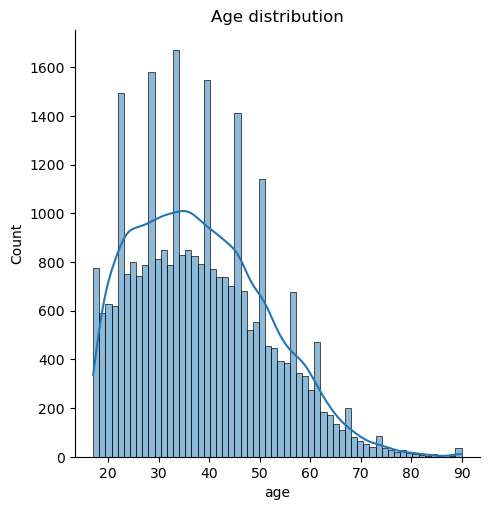

In [61]:
sns.displot(df_train['age'], kde=True)
plt.title('Age distribution')
plt.show()

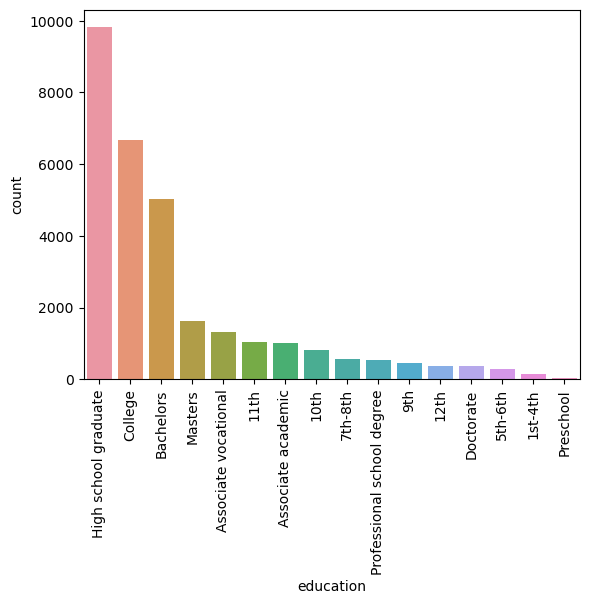

In [62]:
education_num = df_train['education'].value_counts().sort_values(ascending=False)
education_order = education_num.index.tolist()
sns.countplot(x='education',data=df_train, order=education_order)
plt.xticks(rotation=90)
plt.show()

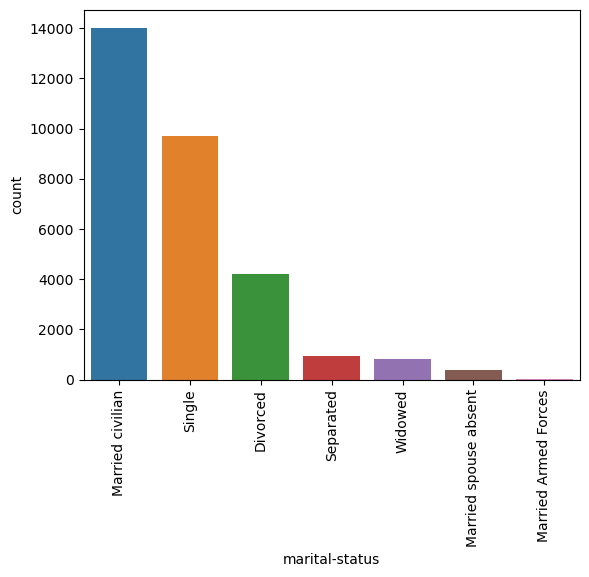

In [63]:
marital_num = df_train['marital-status'].value_counts().sort_values(ascending=False)
marital_order = marital_num.index.tolist()
sns.countplot(x='marital-status',data=df_train, order=marital_order)
plt.xticks(rotation=90)
plt.show()

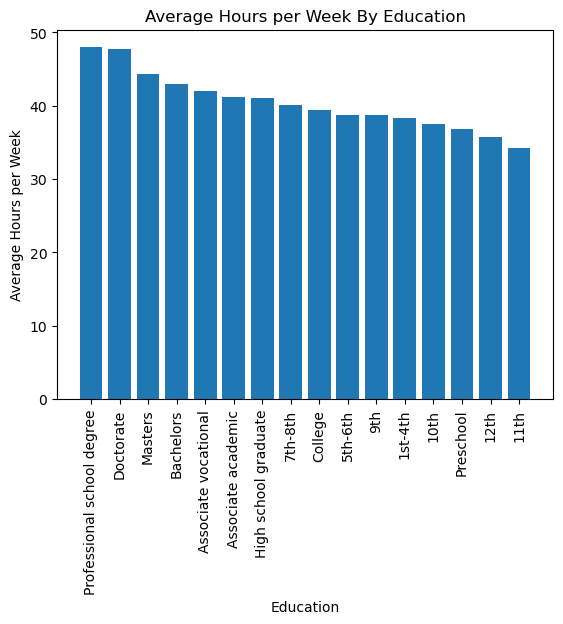

In [64]:
edu_hours = df_train.groupby('education')['hours-per-week'].mean().sort_values(ascending=False)
plt.bar(edu_hours.index, edu_hours.values)
plt.xticks(rotation=90)
plt.xlabel('Education')
plt.ylabel('Average Hours per Week')
plt.title('Average Hours per Week By Education')
plt.show()

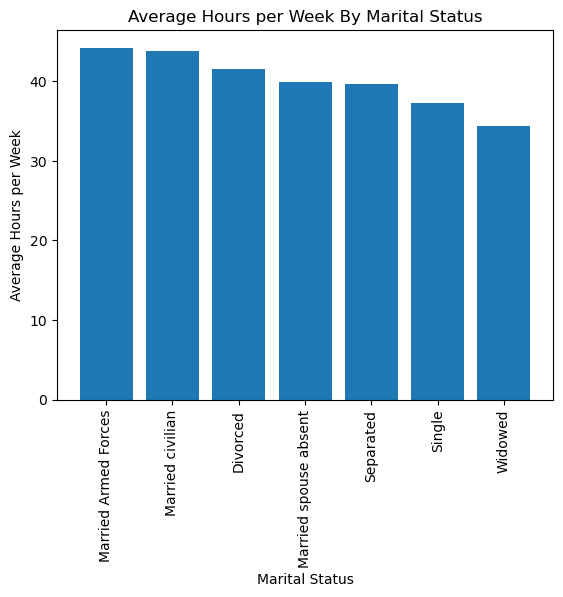

In [65]:
marital_hours = df_train.groupby('marital-status')['hours-per-week'].mean().sort_values(ascending=False)
plt.bar(marital_hours.index, marital_hours.values)
plt.xticks(rotation=90)
plt.xlabel('Marital Status')
plt.ylabel('Average Hours per Week')
plt.title('Average Hours per Week By Marital Status')
plt.show()

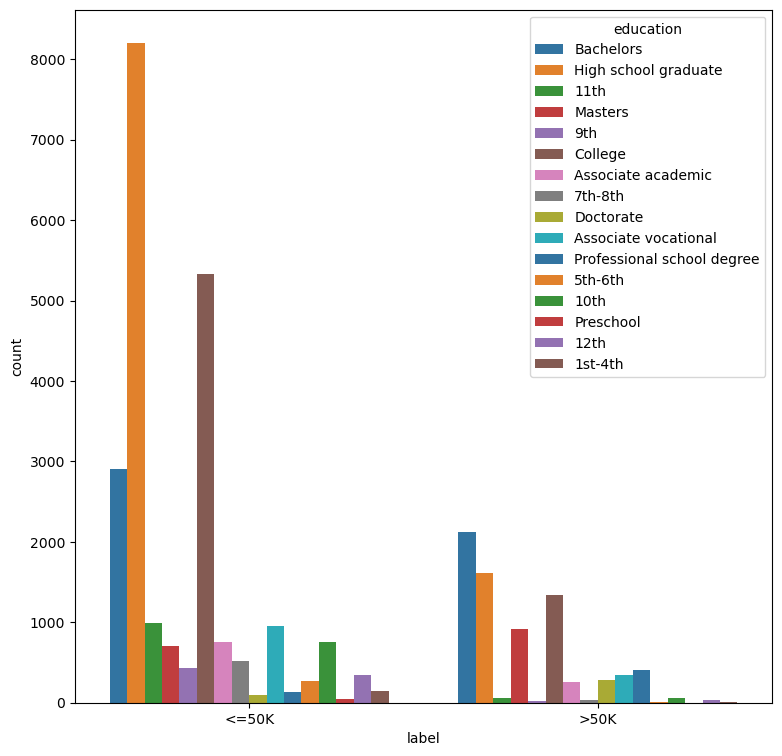

In [66]:
plt.figure(figsize=(9,9))
sns.countplot(x='label',hue='education',data=df_train,palette='tab10')
plt.show()

In [67]:
df_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State government,77516,Bachelors,13,Single,Administrative,Not in family,White,Male,2174,0,40,United States,<=50K
1,50,Self employed,83311,Bachelors,13,Married civilian,Managerial,Husband,White,Male,0,0,13,United States,<=50K
2,38,Private,215646,High school graduate,9,Divorced,Handlers,Not in family,White,Male,0,0,40,United States,<=50K
3,53,Private,234721,11th,7,Married civilian,Handlers,Husband,Black,Male,0,0,40,United States,<=50K
4,28,Private,338409,Bachelors,13,Married civilian,Professional,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30713,27,Private,257302,Associate academic,12,Married civilian,Tech support,Wife,White,Female,0,0,38,United States,<=50K
30714,40,Private,154374,High school graduate,9,Married civilian,Machine inspectors,Husband,White,Male,0,0,40,United States,>50K
30715,58,Private,151910,High school graduate,9,Widowed,Administrative,Single,White,Female,0,0,40,United States,<=50K
30716,22,Private,201490,High school graduate,9,Single,Administrative,Child,White,Male,0,0,20,United States,<=50K


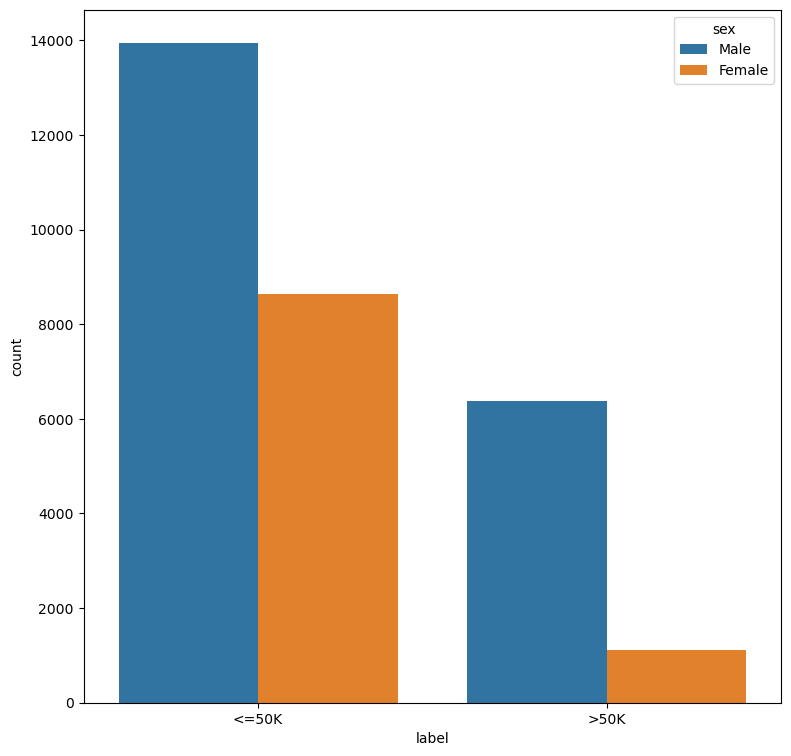

In [68]:
plt.figure(figsize=(9,9))
sns.countplot(x='label',hue='sex',data=df_train,palette='tab10')
plt.show()

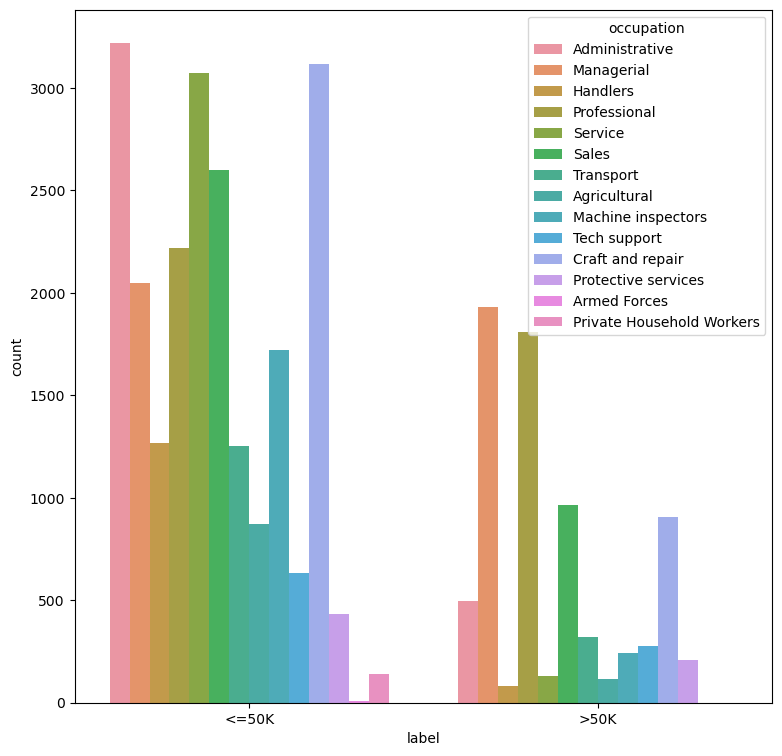

In [69]:
plt.figure(figsize=(9,9))
sns.countplot(x='label',hue='occupation',data=df_train)
plt.show()

In [70]:
def age_range(age):
    if 16 <= age <= 20:
        return '16-20'
    elif 21 <= age <= 30:
        return '21-30'
    elif 31 <= age <= 40:
        return '31-40'
    elif 41 <= age <= 50:
        return '41-50'
    elif 51 <= age <= 60:
        return '51-60'
    elif age >= 61:
        return '60+'

In [71]:
df_train['age_range'] = df_train['age'].apply(age_range)
df_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label,age_range
0,39,State government,77516,Bachelors,13,Single,Administrative,Not in family,White,Male,2174,0,40,United States,<=50K,31-40
1,50,Self employed,83311,Bachelors,13,Married civilian,Managerial,Husband,White,Male,0,0,13,United States,<=50K,41-50
2,38,Private,215646,High school graduate,9,Divorced,Handlers,Not in family,White,Male,0,0,40,United States,<=50K,31-40
3,53,Private,234721,11th,7,Married civilian,Handlers,Husband,Black,Male,0,0,40,United States,<=50K,51-60
4,28,Private,338409,Bachelors,13,Married civilian,Professional,Wife,Black,Female,0,0,40,Cuba,<=50K,21-30


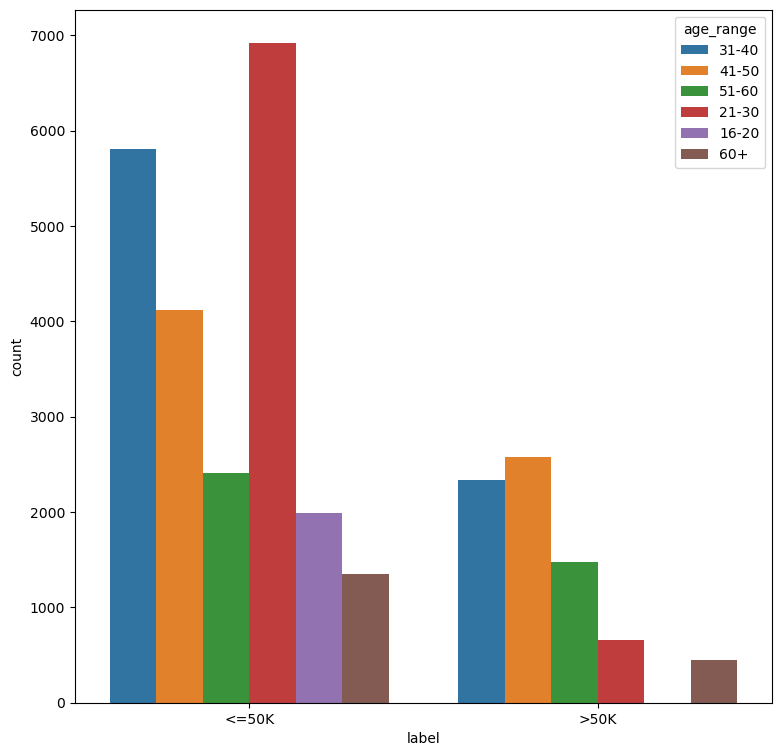

In [72]:
plt.figure(figsize=(9,9))
sns.countplot(x='label',hue='age_range',data=df_train)
plt.show()

### Building Classification Models

In [73]:
df_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label,age_range
0,39,State government,77516,Bachelors,13,Single,Administrative,Not in family,White,Male,2174,0,40,United States,<=50K,31-40
1,50,Self employed,83311,Bachelors,13,Married civilian,Managerial,Husband,White,Male,0,0,13,United States,<=50K,41-50
2,38,Private,215646,High school graduate,9,Divorced,Handlers,Not in family,White,Male,0,0,40,United States,<=50K,31-40
3,53,Private,234721,11th,7,Married civilian,Handlers,Husband,Black,Male,0,0,40,United States,<=50K,51-60
4,28,Private,338409,Bachelors,13,Married civilian,Professional,Wife,Black,Female,0,0,40,Cuba,<=50K,21-30


In [74]:
df_train = df_train.drop(columns=['fnlwgt', 'education', 'age_range'])

In [75]:
#selecting all the categorical variables 
df_object = df_train.select_dtypes(include=["object"])
cat_col = df_object.columns
cat_col

Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'native-country', 'label'],
      dtype='object')

In [76]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

In [77]:
#encoding the categoriacl variables using labelencoder
for col in cat_col:
    df_train[str(col)] = lab.fit_transform(df_train[str(col)])

In [78]:
df_train.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,4,13,5,0,2,4,1,2174,0,40,37,0
1,50,3,13,2,6,1,4,1,0,0,13,37,0
2,38,2,9,0,4,2,4,1,0,0,40,37,0
3,53,2,7,2,4,1,2,1,0,0,40,37,0
4,28,2,13,2,8,5,2,0,0,0,40,4,0


In [79]:
#preparing the dataset for splitting
df_train_x = df_train.drop('label', axis=1)
df_train_y = df_train['label']

In [80]:
from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV
from sklearn.feature_selection import RFECV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [81]:
X_train, X_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.3, stratify=df_train_y)

In [82]:
rfe = RFECV(estimator= DecisionTreeClassifier(random_state=42,max_features=9), step=1, cv=5, scoring='accuracy', min_features_to_select = 9)
rfe.fit(X_train, y_train)

RFECV(cv=5, estimator=DecisionTreeClassifier(max_features=9, random_state=42),
      min_features_to_select=9, scoring='accuracy')

In [83]:
# Select the optimal features from the training set
X_train_optimal = X_train.iloc[:, rfe.support_]
X_test_optimal = X_test.iloc[:, rfe.support_]

In [84]:
#KNN
param_distributions = {
                      'n_neighbors': list(range(1, 5)),
                      'weights': ['uniform', 'distance'],
                      'p' : [1, 2]
                      }

In [85]:

random_cv = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_distributions, n_iter=10, cv=5, random_state=42)
random_cv.fit(X_train_optimal, y_train)
print('Best hyperparameters: ', random_cv.best_params_)
print('Mean cross-validation score: ', random_cv.best_score_)

Best hyperparameters:  {'weights': 'uniform', 'p': 2, 'n_neighbors': 4}
Mean cross-validation score:  0.8401462235665891


In [86]:
knn_op = KNeighborsClassifier(n_neighbors=random_cv.best_params_['n_neighbors'], weights=random_cv.best_params_['weights'], p=random_cv.best_params_['p'])
knn_op.fit(X_train_optimal, y_train)

KNeighborsClassifier(n_neighbors=4)

In [87]:
y_pred_knn = knn_op.predict(X_test_optimal)
accuracy = accuracy_score(y_test, y_pred_knn)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
print(f"KNeighborsClassifier Accuracy: {accuracy:.4f}")
print(f"KNeighborsClassifier True Positive Rate: {tpr:.4f}")
print(f"KNeighborsClassifier True Negative Rate: {tnr:.4f}")

KNeighborsClassifier Accuracy: 0.8395
KNeighborsClassifier True Positive Rate: 0.5267
KNeighborsClassifier True Negative Rate: 0.9432


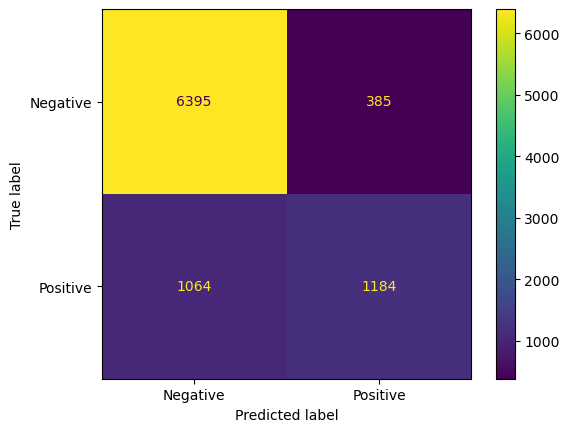

In [88]:
from sklearn import metrics
confusion_matrix_knn = metrics.confusion_matrix(y_test, y_pred_knn)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_knn, display_labels = ['Negative', 'Positive'])

cm_display.plot()
plt.show()

In [100]:
#NBC
param_distributions = {'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

In [101]:
random_cv = RandomizedSearchCV(GaussianNB(), param_distributions=param_distributions, n_iter=6, cv=5, random_state=42)
random_cv.fit(X_train_optimal, y_train)
print('Best hyperparameters: ', random_cv.best_params_)
print('Mean cross-validation score: ', random_cv.best_score_)

c:\Users\LENOVO\anaconda3\envs\new_env\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best hyperparameters:  {'var_smoothing': 1e-10}
Mean cross-validation score:  0.7967050162872618


In [102]:
nbc_op = GaussianNB(var_smoothing=random_cv.best_params_['var_smoothing'])
nbc_op.fit(X_train_optimal, y_train)

GaussianNB(var_smoothing=1e-10)

In [103]:
y_pred_nbc = nbc_op.predict(X_test_optimal)
accuracy = accuracy_score(y_test, y_pred_nbc)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_nbc).ravel()
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
print(f"Naive Bayes Classifier: {accuracy:.4f}")
print(f"Naive Bayes Classifier True Positive Rate: {tpr:.4f}")
print(f"Naive Bayes Classifier True Negative Rate: {tnr:.4f}")

Naive Bayes Classifier: 0.7995
Naive Bayes Classifier True Positive Rate: 0.3372
Naive Bayes Classifier True Negative Rate: 0.9528


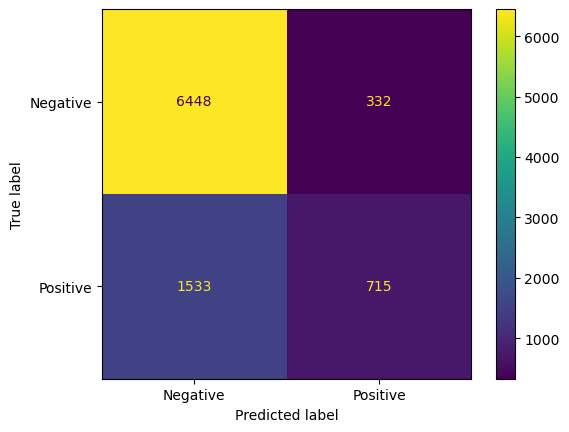

In [93]:
from sklearn import metrics
confusion_matrix_nbc = metrics.confusion_matrix(y_test, y_pred_nbc)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_nbc, display_labels = ['Negative', 'Positive'])

cm_display.plot()
plt.show()

In [94]:
#DTC
max_depth = range(3, 15)
min_samples_split = [2, 5, 10, 15, 20]
min_samples_leaf = [1, 2, 4, 8, 16]
max_features = ["sqrt", "log2", None]

In [95]:
param_distributions  = {'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf' : min_samples_leaf,
                        'max_features' : max_features
                        }

In [96]:
random_cv = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=param_distributions, n_iter=10, cv=5, random_state=42)
random_cv.fit(X_train_optimal, y_train)
print('Best hyperparameters: ', random_cv.best_params_)
print('Mean cross-validation score: ', random_cv.best_score_)

Best hyperparameters:  {'min_samples_split': 15, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 10}
Mean cross-validation score:  0.8513029133133572


In [97]:
dtc_op = DecisionTreeClassifier(max_depth=random_cv.best_params_['max_depth'], max_features=random_cv.best_params_['max_features'], min_samples_leaf=random_cv.best_params_['min_samples_leaf'], min_samples_split=random_cv.best_params_['min_samples_split'])
dtc_op.fit(X_train_optimal, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=15)

In [98]:
y_pred_dtc = dtc_op.predict(X_test_optimal)
accuracy = accuracy_score(y_test, y_pred_dtc)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_dtc).ravel()
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
print(f"DecisionTreeClassifier Accuracy: {accuracy:.4f}")
print(f"DecisionTreeClassifier True Positive Rate: {tpr:.4f}")
print(f"DecisionTreeClassifier True Negative Rate: {tnr:.4f}")

DecisionTreeClassifier Accuracy: 0.8539
DecisionTreeClassifier True Positive Rate: 0.6165
DecisionTreeClassifier True Negative Rate: 0.9326


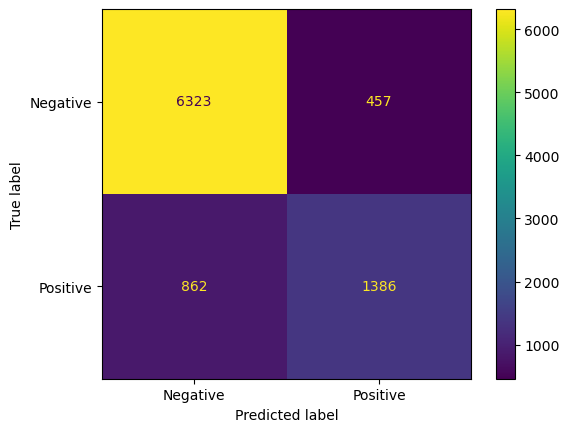

In [99]:
confusion_matrix_dtc = metrics.confusion_matrix(y_test, y_pred_dtc)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_dtc, display_labels = ['Negative', 'Positive'])

cm_display.plot()
plt.show()

In [116]:
import pickle

with open('dtc_op_model.pkl', 'wb') as f:
    pickle.dump(dtc_op, f)

In [106]:
df_test = df_test.drop(columns=['fnlwgt', 'education'])

In [107]:
df_test[['education-num', 'capital-gain', 'capital-loss', 'hours-per-week','age']] = df_test[['education-num', 'capital-gain', 'capital-loss', 'hours-per-week','age']].astype(int)

In [108]:
df_test

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,25,Private,7,Single,Machine inspectors,Child,Black,Male,0,0,40,United States,<=50K.
1,38,Private,9,Married civilian,Agricultural,Husband,White,Male,0,0,50,United States,<=50K.
2,28,Local government,12,Married civilian,Protective services,Husband,White,Male,0,0,40,United States,>50K.
3,44,Private,10,Married civilian,Machine inspectors,Husband,Black,Male,7688,0,40,United States,>50K.
4,34,Private,6,Single,Service,Not in family,White,Male,0,0,30,United States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15310,33,Private,13,Single,Professional,Child,White,Male,0,0,40,United States,<=50K.
15311,39,Private,13,Divorced,Professional,Not in family,White,Female,0,0,36,United States,<=50K.
15312,38,Private,13,Married civilian,Professional,Husband,White,Male,0,0,50,United States,<=50K.
15313,44,Private,13,Divorced,Administrative,Child,Asian-Pac-Islander,Male,5455,0,40,United States,<=50K.


In [109]:
#selecting all the categorical variables 
df_object_test = df_test.select_dtypes(include=["object"])
test_cat_col = df_object_test.columns
test_cat_col

Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'native-country', 'label'],
      dtype='object')

In [110]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

In [111]:
#encoding the categoriacl variables using labelencoder
for col in test_cat_col:
    df_test[str(col)] = lab.fit_transform(df_test[str(col)])

In [112]:
df_test

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,25,2,7,5,5,0,2,1,0,0,40,35,0
1,38,2,9,2,1,1,4,1,0,0,50,35,0
2,28,1,12,2,9,1,4,1,0,0,40,35,1
3,44,2,10,2,5,1,2,1,7688,0,40,35,1
4,34,2,6,5,11,2,4,1,0,0,30,35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15310,33,2,13,5,8,0,4,1,0,0,40,35,0
15311,39,2,13,0,8,2,4,0,0,0,36,35,0
15312,38,2,13,2,8,1,4,1,0,0,50,35,0
15313,44,2,13,0,0,0,1,1,5455,0,40,35,0


In [113]:
#this is the test data
df_test_x = df_test.drop('label', axis= 1)
df_test_y = df_test['label']

In [114]:
df_test_x_optimal = df_test_x.loc[:, X_test_optimal.columns]
df_test_x_optimal

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,2,7,5,5,0,2,1,0,0,40,35
1,38,2,9,2,1,1,4,1,0,0,50,35
2,28,1,12,2,9,1,4,1,0,0,40,35
3,44,2,10,2,5,1,2,1,7688,0,40,35
4,34,2,6,5,11,2,4,1,0,0,30,35
...,...,...,...,...,...,...,...,...,...,...,...,...
15310,33,2,13,5,8,0,4,1,0,0,40,35
15311,39,2,13,0,8,2,4,0,0,0,36,35
15312,38,2,13,2,8,1,4,1,0,0,50,35
15313,44,2,13,0,0,0,1,1,5455,0,40,35


In [119]:
# Loading the saved model
with open('dtc_op_model.pkl', 'rb') as f:
    dtc_op_loaded = pickle.load(f)

EOFError: Ran out of input

In [ ]:
# Using the loaded model on test data
y_pred_dtc_loaded = dtc_op_loaded.predict(df_test_x_optimal)
accuracy_loaded = accuracy_score(df_test_y, y_pred_dtc_loaded)
tn_loaded, fp_loaded, fn_loaded, tp_loaded = confusion_matrix(df_test_y, y_pred_dtc_loaded).ravel()
tpr_loaded = tp_loaded / (tp_loaded + fn_loaded)
tnr_loaded = tn_loaded / (tn_loaded + fp_loaded)
print(f"DecisionTreeClassifier Loaded Model Accuracy: {accuracy_loaded:.4f}")
print(f"DecisionTreeClassifier Loaded Model True Positive Rate: {tpr_loaded:.4f}")
print(f"DecisionTreeClassifier Loaded Model True Negative Rate: {tnr_loaded:.4f}")

In [ ]:
k

In [ ]:
#RandomForestClassifier
max_depth = range(3, 15)
min_samples_split = [2, 5, 10, 15, 20]
min_samples_leaf = [1, 2, 4, 8, 16]
max_features = ["sqrt", "log2", None]

In [ ]:
param_distributions  = {'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf' : min_samples_leaf,
                        'max_features' : max_features
                        }

In [ ]:
random_cv = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_distributions, n_iter=10, cv=5, random_state=42)
random_cv.fit(X_train_optimal, y_train)
print('Best hyperparameters: ', random_cv.best_params_)
print('Mean cross-validation score: ', random_cv.best_score_)

Best hyperparameters:  {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 14}
Mean cross-validation score:  0.8555758089700648


In [ ]:
rfc_op = RandomForestClassifier(max_depth=random_cv.best_params_['max_depth'], max_features=random_cv.best_params_['max_features'], min_samples_leaf=random_cv.best_params_['min_samples_leaf'], min_samples_split=random_cv.best_params_['min_samples_split'])
rfc_op.fit(X_train_optimal, y_train)

RandomForestClassifier(max_depth=14, min_samples_split=10)

In [ ]:
y_pred_rfc = rfc_op.predict(X_test_optimal)
accuracy = accuracy_score(y_test, y_pred_rfc)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rfc).ravel()
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
print(f"RandomForestClassifier Accuracy: {accuracy:.4f}")
print(f"RandomForestClassifier True Positive Rate: {tpr:.4f}")
print(f"RandomForestClassifier True Negative Rate: {tnr:.4f}")

RandomForestClassifier Accuracy: 0.8656
RandomForestClassifier True Positive Rate: 0.5952
RandomForestClassifier True Negative Rate: 0.9553


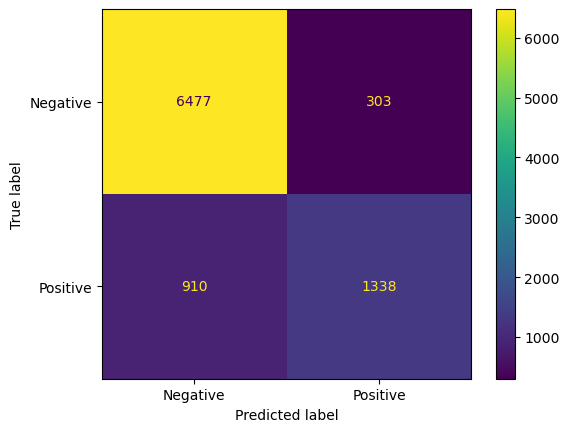

In [ ]:
confusion_matrix_rfc = metrics.confusion_matrix(y_test, y_pred_rfc)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rfc, display_labels = ['Negative', 'Positive'])

cm_display.plot()
plt.show()

In [ ]:
param_distributions = {
    'learning_rate': np.arange(0.01, 0.2, 0.01),
    'max_depth': range(1, 10),
    'subsample': np.arange(0.1, 1, 0.1),
    'colsample_bytree': np.arange(0.1, 1, 0.1),
    'n_estimators': range(100, 1000, 100)
}

In [ ]:
random_cv = RandomizedSearchCV(XGBClassifier(), param_distributions=param_distributions, n_iter=10, cv=5, random_state=42)
random_cv.fit(X_train_optimal, y_train)
print('Best hyperparameters: ', random_cv.best_params_)
print('Mean cross-validation score: ', random_cv.best_score_)

In [ ]:
xgb_op = XGBClassifier(max_depth=random_cv.best_params_['max_depth'], learning_rate=random_cv.best_params_['learning_rate'], subsample=random_cv.best_params_['subsample'], colsample_bytree=random_cv.best_params_['colsample_bytree'],n_estimators=random_cv.best_params_['n_estimators'])
xgb_op.fit(X_train_optimal, y_train)

In [ ]:
y_pred_xgb = xgb_op.predict(X_test_optimal)
accuracy = accuracy_score(y_test, y_pred_xgb)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_xgb).ravel()
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
print(f"XGBClassifier Accuracy: {accuracy:.4f}")
print(f"XGBClassifier True Positive Rate: {tpr:.4f}")
print(f"XGBClassifier True Negative Rate: {tnr:.4f}")

The RandomForestClassifier is the model with the highest accuracy  and true negative rate . Although the DecisionTreeClassifier has a higher true positive rate of it has a lower accuracy and true negative rate.

The KNeighborsClassifier is the worst-performing model out of the three with the lowest accuracy and lowest true positive rate.

The RandomForestClassifier is the top model out of the three.

In [ ]:
import pickle

with open('rfc_op_model.pkl', 'wb') as f:
    pickle.dump(rfc_op, f)


In [ ]:
df_test = df_test.drop(columns=['fnlwgt', 'education'])

In [ ]:
df_test[['education-num', 'capital-gain', 'capital-loss', 'hours-per-week','age']] = df_test[['education-num', 'capital-gain', 'capital-loss', 'hours-per-week','age']].astype(int)

In [ ]:
df_test

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,25,Private,7,Single,Machine inspectors,Child,Black,Male,0,0,40,United States,<=50K.
1,38,Private,9,Married civilian,Agricultural,Husband,White,Male,0,0,50,United States,<=50K.
2,28,Local government,12,Married civilian,Protective services,Husband,White,Male,0,0,40,United States,>50K.
3,44,Private,10,Married civilian,Machine inspectors,Husband,Black,Male,7688,0,40,United States,>50K.
4,34,Private,6,Single,Service,Not in family,White,Male,0,0,30,United States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15310,33,Private,13,Single,Professional,Child,White,Male,0,0,40,United States,<=50K.
15311,39,Private,13,Divorced,Professional,Not in family,White,Female,0,0,36,United States,<=50K.
15312,38,Private,13,Married civilian,Professional,Husband,White,Male,0,0,50,United States,<=50K.
15313,44,Private,13,Divorced,Administrative,Child,Asian-Pac-Islander,Male,5455,0,40,United States,<=50K.


In [ ]:
#selecting all the categorical variables 
df_object_test = df_test.select_dtypes(include=["object"])
test_cat_col = df_object_test.columns
test_cat_col

Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'native-country', 'label'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

In [ ]:
#encoding the categoriacl variables using labelencoder
for col in test_cat_col:
    df_test[str(col)] = lab.fit_transform(df_test[str(col)])

In [ ]:
df_test

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,25,2,7,5,5,0,2,1,0,0,40,35,0
1,38,2,9,2,1,1,4,1,0,0,50,35,0
2,28,1,12,2,9,1,4,1,0,0,40,35,1
3,44,2,10,2,5,1,2,1,7688,0,40,35,1
4,34,2,6,5,11,2,4,1,0,0,30,35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15310,33,2,13,5,8,0,4,1,0,0,40,35,0
15311,39,2,13,0,8,2,4,0,0,0,36,35,0
15312,38,2,13,2,8,1,4,1,0,0,50,35,0
15313,44,2,13,0,0,0,1,1,5455,0,40,35,0


In [ ]:
#this is the test data
df_test_x = df_test.drop('label', axis= 1)
df_test_y = df_test['label']

In [ ]:
df_test_x_optimal = df_test_x.loc[:, X_test_optimal.columns]
df_test_x_optimal

,age,workclass,education-num,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week
0,25,2,7,5,5,0,0,0,40
1,38,2,9,2,1,1,0,0,50
2,28,1,12,2,9,1,0,0,40
3,44,2,10,2,5,1,7688,0,40
4,34,2,6,5,11,2,0,0,30
...,...,...,...,...,...,...,...,...,...
15310,33,2,13,5,8,0,0,0,40
15311,39,2,13,0,8,2,0,0,36
15312,38,2,13,2,8,1,0,0,50
15313,44,2,13,0,0,0,5455,0,40


In [ ]:
# Loading the saved model
with open('rfc_op_model.pkl', 'rb') as f:
    rfc_op_loaded = pickle.load(f)

# Using the loaded model on test data
y_pred_rfc_loaded = rfc_op_loaded.predict(df_test_x_optimal)
accuracy_loaded = accuracy_score(df_test_y, y_pred_rfc_loaded)
tn_loaded, fp_loaded, fn_loaded, tp_loaded = confusion_matrix(df_test_y, y_pred_rfc_loaded).ravel()
tpr_loaded = tp_loaded / (tp_loaded + fn_loaded)
tnr_loaded = tn_loaded / (tn_loaded + fp_loaded)
print(f"RandomForestClassifier Loaded Model Accuracy: {accuracy_loaded:.4f}")
print(f"RandomForestClassifier Loaded Model True Positive Rate: {tpr_loaded:.4f}")
print(f"RandomForestClassifier Loaded Model True Negative Rate: {tnr_loaded:.4f}")


RandomForestClassifier Loaded Model Accuracy: 0.8589
RandomForestClassifier Loaded Model True Positive Rate: 0.5893
RandomForestClassifier Loaded Model True Negative Rate: 0.9468


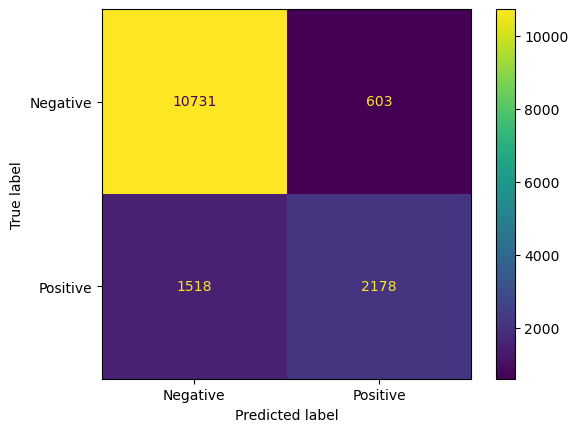

In [ ]:
confusion_matrix_test = metrics.confusion_matrix(df_test_y, y_pred_rfc_loaded)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_test, display_labels = ['Negative', 'Positive'])

cm_display.plot()
plt.show()

Filter Method: Instead of focusing on cross-validation performance, filter method approaches capture the inherent characteristics of the features assessed by univariate statistics. Compared to wrapper methods, these techniques are quicker and more computationally efficient. Using filter methods while working with high-dimensional data is computationally more affordable. Using statistical tests like the chi-squared test, mutual information, and correlation, this method chooses the dataset's most pertinent properties. In order to minimize the dimensionality of the data, unnecessary characteristics are removed after the classifier has chosen the features independently. 


Wrapper Method: In order to evaluate the quality of feature subsets, wrappers need a method for searching the space of all conceivable feature subsets and learning and evaluating classifiers using the feature subset in question. The method for choosing features is dependant on the machine learning algorithm we are trying to fit to a particular dataset. It employs a greedy search strategy by comparing every potential feature combination to the evaluation criterion. The prediction accuracy of wrapper methods is typically higher than that of filter approaches.With this approach, the classification algorithm and feature selection are both carried out simultaneously. A subset of features is chosen, the classifier is trained using that subset, its performance is assessed, and the process is repeated until the optimal subset of features is identified. While being computationally costly, this approach has the potential to improve classification accuracy.


Embedded Method: By including feature interactions while keeping appropriate computational costs, these methods combine the advantages of both the wrapper and filter approaches. Embedded approaches are iterative in that they handle each round of the model training process and carefully separate out the elements that are most helpful in training for that round.In this approach, the classifier is trained using the most pertinent attributes. During model training process, the most pertinent features can be chosen using built-in feature selection methods in several machine learning algorithms including decision trees, Lasso regression, and Random Forest. This approach produces a better understandable model and is computationally effective.